In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from random import*
from scipy.stats import entropy

# Problem 1, questions a-b)

In [2]:
def myentropy0(plist): #this version has an issue when a probability is 0
    result=0;
    for i in range(np.size(plist)):
        result=result-plist[i]*np.log2(plist[i])
    return result

In [3]:
myentropy0([9/10, 1/10])

0.4689955935892812

In [4]:
myentropy0([1,0])

<ipython-input-2-956a15f87483>:4: RuntimeWarning: divide by zero encountered in log2
  result=result-plist[i]*np.log2(plist[i])
<ipython-input-2-956a15f87483>:4: RuntimeWarning: invalid value encountered in double_scalars
  result=result-plist[i]*np.log2(plist[i])


nan

In [5]:
def myentropy(plist): #this version has no issue when a probability is 0
    result=0;
    for i in range(np.size(plist)):
        if plist[i]>0:
            result=result-plist[i]*np.log2(plist[i])
    return result

In [6]:
myentropy([9/10, 1/10])

0.4689955935892812

In [7]:
myentropy([1,0])

0.0

# Problem 1, question c)

In [8]:
entropy([9/10, 1/10], base=2)

0.46899559358928117

In [9]:
entropy([1,0], base=2)

0.0

In [10]:
pvals=np.linspace(0, 1, 20)
entropies=np.zeros(np.size(pvals))
for i in range(np.size(pvals)):
    entropies[i]=entropy([pvals[i], 1-pvals[i]], base=2)

# Problem 1, question d)

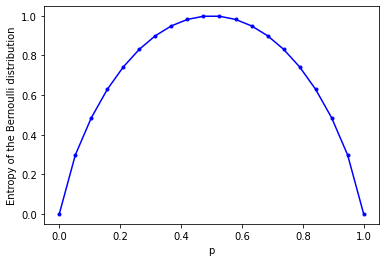

In [11]:
plt.plot(pvals, entropies,'b.-')
ax = plt.gca()
ax.set_xlabel("p")
ax.set_ylabel("Entropy of the Bernoulli distribution")
plt.show()

# Problem 1, question e)

In [12]:
from scipy.stats import binom

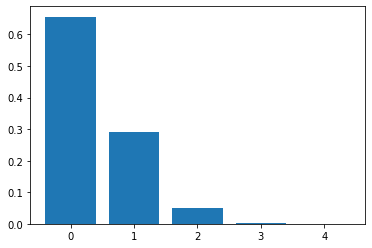

In [13]:
plt.bar(range(5),binom.pmf(range(5),4,0.1),label='Data')
plt.show()

In [14]:
entropy(binom.pmf(range(5),4,0.1), base=2)

1.1599531968220769

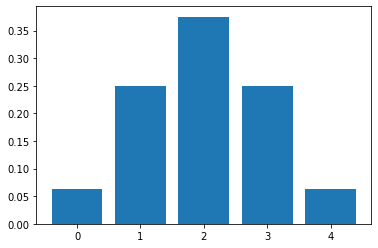

In [15]:
plt.bar(range(5),binom.pmf(range(5),4,0.5),label='Data')
plt.show()

In [16]:
entropy(binom.pmf(range(5),4,0.5), base=2)

2.0306390622295667

# Problem 2

a) Each time we draw the random variable X, there is a probability p_i to obtain i, and (1-p_i) to obtain another value. Thus, if we draw it N times, the number n_i of times where x=i will follow a binomial distribution with parameters N and p_i.

b) In this limit, n_i follows a Poisson distribution with mean Np_i and variance Np_i. 
Since f_i=n_i/N, the mean of f_i is thus p_i and its variance is p_i/N.

c) The mean of f_i is p_i, and thus, the mean of delta_i is zero. To compute the variance of f_i we can compute the mean of f_i^2, which is $\langle f_i^2\rangle=\langle(p_i+\delta_i)^2\rangle=p_i^2+2p_i\langle\delta_i\rangle+\langle\delta_i^2\rangle=p_i^2+\langle\delta_i^2\rangle$. Thus, $\Delta f_i^2=\langle f_i^2\rangle-\langle f_i\rangle^2=\langle\delta_i^2\rangle$. But we know that the variance of f_i is p_i/N. Thus, we have $\langle\delta_i^2\rangle=p_i/N$, and the variance of $\delta_i$ is also p_i/N (because the mean of delta_i is zero).

d) $\hat{H}(X)=-\sum_i f_i log_2(f_i)=-\sum_i (p_i+\delta_i) log_2(p_i+\delta_i)=-\sum_i p_i log_2[p_i(1+\delta_i/p_i)]-\sum_i \delta_i log_2[p_i(1+\delta_i/p_i)]$.
Thus, $\hat{H}(X)=H(X)-\sum_i p_i log_2(1+\delta_i/p_i)-\sum_i \delta_i log_2p_i-\sum_i\delta_ilog_2(1+\delta_i/p_i)$. To second order in $\delta_i/p_i$, we get $\hat{H}(X)\approx H(X)-[1/\ln(2)]\sum_i(\delta_i-\delta_i^2/(2p_i))-\sum_i \delta_i log_2p_i-[1/\ln(2)]\sum_i\delta_i^2/p_i$, which gives
$\hat{H}(X)\approx H(X)-\sum_i\delta_i[1/\ln(2)-log_2(p_i)]-[1/(2\ln(2))]\sum_i\delta_i^2/p_i$.
Taking the average gives
$\langle\hat{H}(X)\rangle\approx H(X)-[1/(2\ln(2))]\sum_i1/N\approx H(X)-[1/(2\ln(2))]K/N$. Thus, we obtain equation 1, with $\alpha=1/(2\ln(2))$.

In [2]:
1/(2*math.log(2))

0.7213475204444817

e) When we estimate entropy from a finite number N of observations, we face an error even on average over many samplings of N observations. This is a systematic error, the entropy is on average underestimated, and this underestimation is bigger if N is smaller and/or if K is larger. 

## Problem 2, question f)

In [3]:
repl=50
Ns=[20,30,40,50,60,75,100]  #Ns=[100000]
entropies=np.zeros((repl,np.size(Ns)))
for iN in range(np.size(Ns)):
    Nsamples=Ns[iN]
    print(Nsamples)
    for j in range(repl):
        samples=np.zeros(Nsamples)
        for i in range(Nsamples):
            samples[i]=randint(0, 9)
        hist, bin_edges = np.histogram(samples, bins=np.linspace(-0.5,9.5,11), density=True)
        #hist, bin_edges = np.histogram(samples, bins=10, range=(0,10), density=True)
        entropies[j,iN]=entropy(hist, base=2)

20
30
40
50
60
75
100


## Problem 2, question g)

In [4]:
table=np.zeros((np.size(Ns),4))
table[:,0]=Ns
table[:,1]=np.divide(1,Ns)
table[:,2]=np.mean(entropies,0)
table[:,3]=np.std(entropies,0)
table

array([[2.00000000e+01, 5.00000000e-02, 2.90973064e+00, 1.63389672e-01],
       [3.00000000e+01, 3.33333333e-02, 3.10930197e+00, 9.74720100e-02],
       [4.00000000e+01, 2.50000000e-02, 3.13854413e+00, 8.85517167e-02],
       [5.00000000e+01, 2.00000000e-02, 3.18056997e+00, 7.72068918e-02],
       [6.00000000e+01, 1.66666667e-02, 3.21047230e+00, 5.07703431e-02],
       [7.50000000e+01, 1.33333333e-02, 3.23635487e+00, 4.82903615e-02],
       [1.00000000e+02, 1.00000000e-02, 3.25091397e+00, 3.42502299e-02]])

## Problem 2, question h)

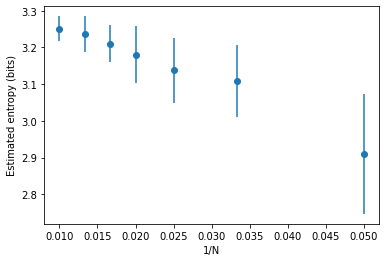

In [5]:
plt.errorbar(table[:,1],table[:,2],table[:,3],marker='o',linestyle='None')
ax = plt.gca()
ax.set_xlabel("1/N")
ax.set_ylabel("Estimated entropy (bits)")
plt.show()

## Problem 2, question i)

The exact value of the entropy of X is log_2(10), since X is a uniformly distributed random variable that can take 10 distinct states.

In [6]:
math.log(10,2)

3.3219280948873626

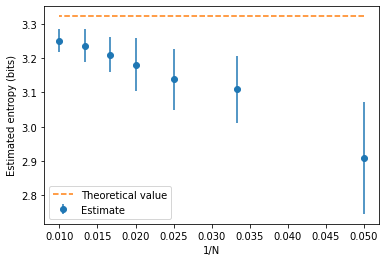

In [7]:
plt.errorbar(table[:,1],table[:,2],table[:,3],marker='o',linestyle='None',label='Estimate')
plt.plot(table[:,1],math.log(10,2)*np.ones(table[:,1].size),linestyle='--',label='Theoretical value')
ax = plt.gca()
ax.set_xlabel("1/N")
ax.set_ylabel("Estimated entropy (bits)")
ax.legend()
plt.show()

## Problem 2, question j)

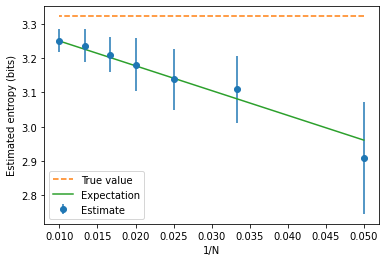

In [8]:
plt.errorbar(table[:,1],table[:,2],table[:,3],marker='o',linestyle='None',label='Estimate')
plt.plot(table[:,1],math.log(10,2)*np.ones(table[:,1].size),linestyle='--',label='True value')
plt.plot(table[:,1],math.log(10,2)*np.ones(table[:,1].size)-1/(2*math.log(2))*10*table[:,1],linestyle='-',label='Expectation')
ax = plt.gca()
ax.set_xlabel("1/N")
ax.set_ylabel("Estimated entropy (bits)")
ax.legend()
plt.show()

The line matches well the results obtained from our estimates, which confirms that Equation 1 in the text describes well the finite-size effects.

## Problem 2, question k)

In practice, if we only have access to 100 draws of X, we can subsample them to obtain multiple estimates of $\hat{H}(X)$ for various values of N smaller than this maximal number 100, and this will yield a plot similar to what we have produced. Then, by making a linear fit of $\langle\hat{H}(X)\rangle$ for each value of 1/N, we can estimate $H(X)$ as the intercept of this line.

In [9]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  # create object for the class
model=linear_regressor.fit(table[:,1:2],table[:,2])  # perform linear regression
Y_pred = linear_regressor.predict(table[:,1:2])  # make predictions

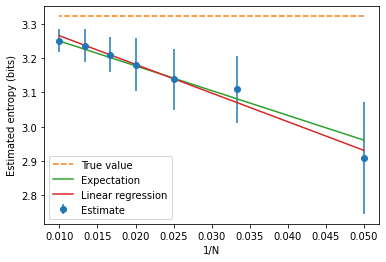

In [10]:
plt.errorbar(table[:,1],table[:,2],table[:,3],marker='o',linestyle='None',label='Estimate')
plt.plot(table[:,1],math.log(10,2)*np.ones(table[:,1].size),linestyle='--',label='True value')
plt.plot(table[:,1],math.log(10,2)*np.ones(table[:,1].size)-1/(2*math.log(2))*10*table[:,1],linestyle='-',label='Expectation')
plt.plot(table[:,1],Y_pred,label='Linear regression')
ax = plt.gca()
ax.set_xlabel("1/N")
ax.set_ylabel("Estimated entropy (bits)")
ax.legend()
plt.show()

We observe a deviation between the linear fit and the theoretical expectation, and it is mostly due to the smaller-N values we considered. This is because equation 1 is an expansion in powers of 1/N, and we restricted to the leading-order correction, but another term in 1/N^2 exists etc., and they become important for smaller N values.

In [11]:
print('intercept:', model.intercept_) #this is our estimate of the entropy, corrected for finite size effects by the linear fit

intercept: 3.3485252532720677


## Problem 2, question l)

In [44]:
np.shape(seqarray)

(5108, 30)

In [45]:
21/5108

0.004111198120595145

In [51]:
21/100

0.21

In [46]:
4/5108

0.0007830853563038371

In [26]:
math.log(21,2)

4.392317422778761

Here, for each column, K=21 and N=5108. Hence, K/N=0.004, to be compared with entropies of order log_2(21)=4.4 bits at maximum. The finite size effects are not too large, on the order of 0.1% in relative terms. If there were only 100 sequences in the dataset, K/N=0.21 and the finite size effects would be substantial. In the case of nucleotide sequences, K=4 instead of 21. So, for the same N as in the dataset we considered, we would have an even smaller impact of finite size effects - and even for N=100 they would not be too large, as K/N=0.04, so about 1%. 

# Problem 3, question c)

In [27]:
import pandas as pd
data_vis=pd.read_csv('Data7.csv', sep='\t',header=None)

In [28]:
data_vis

,0,1,2,3,4,5,6,7,8,9,...,108,109,110,111,112,113,114,115,116,117
0,Population,Barcodes,EvolutionFitness(percent),EvolutionFitnessConfidenceInterval(percent),BarcodingFitness(per barcoding procedure),BarcodingFitnessConfidenceInterval(per barcodi...,Frequency(t=1.0),Frequency(t=1.10),Frequency(t=1.20),Frequency(t=1.30),...,Frequency(t=10.30),Frequency(t=10.40),Frequency(t=10.50),Frequency(t=10.60),Frequency(t=10.70),Frequency(t=10.80),Frequency(t=10.90),Frequency(t=10.100),Frequency(extra1),Frequency(extra2)
1,YPD,ancestor,0.0,-0.0500000000,0.0000000000,0.0,-0.0350000000,0.0300000000,0.9996687868,0.9996741128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,YPD,CCTGGAGCAGTCTAAT,0.75,0.5000000000,0.9500000000,0.23,-0.0350000000,0.4600000000,0.0000398595,0.0000331922,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YPD,ACGAGGCGTGTAATCA,-0.10000000000000009,-0.3000000000,0.0500000000,1.13,0.9600000000,1.2900000000,0.0000351143,0.0000694019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,YPD,GTGCCTAGACCAACTT,0.0,-0.2000000000,0.2000000000,1.095,0.9000000000,1.2700000000,0.0001746224,0.0001468504,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,YPA,CGCGGTGGAACGGAGG_CGCAACATGTAAACTT_AACGATGATACG...,6.550000000000001,5.2000000000,7.8500000000,-0.14999999999999947,-2.6000000000,0.9200000000,0.0000000000,0.0000000000,...,0.0000652686,0.0000475622,0.0000506144,0.0000213532,0.0000085814,0.0000518634,0.0000226326,0.0000240688,0.0000220503,0.0000199094
195,YPA,TCTAGCGCGGCCGAAT_CTATGAGGTAGAAACA_CCGGAAAGAGTA...,7.3,6.4000000000,8.2000000000,-0.8049999999999997,-2.8100000000,0.1650000000,0.0000000000,0.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
196,YPA,TCCATTGAGAACAACT_TGCACACCCATGAGTA_GGTTGCAAGCAT...,7.5,6.7000000000,8.2500000000,4.76,4.0500000000,5.0000000000,0.0000000000,0.0000000000,...,0.0008212964,0.0009469206,0.0011247645,0.0009423863,0.0010211919,0.0008755766,0.0010207315,0.0010861030,0.0011119651,0.0008361953
197,YPA,TCCATTGAGAACAACT_TGCACACCCATGAGTA_GGTTGCAAGCAT...,8.65,7.8500000000,9.4000000000,3.07,2.0450000000,3.7450000000,0.0000000000,0.0000000000,...,0.0008158574,0.0007372144,0.0007212552,0.0007473607,0.0007465857,0.0007779513,0.0007423502,0.0008273638,0.0008536616,0.0008361953


In [29]:
my_data = np.genfromtxt('Data7.csv', delimiter='\t')

In [30]:
my_data

array([[          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan, 0.0000000e+00, ...,           nan,
                  nan,           nan],
       [          nan,           nan, 7.5000000e-01, ...,           nan,
                  nan,           nan],
       ...,
       [          nan,           nan, 7.5000000e+00, ..., 1.0861030e-03,
        1.1119651e-03, 8.3619530e-04],
       [          nan,           nan, 8.6500000e+00, ..., 8.2736380e-04,
        8.5366160e-04, 8.3619530e-04],
       [          nan,           nan, 8.4000000e+00, ..., 5.1747840e-04,
        5.2290710e-04, 4.3800710e-04]])

# Problem 3, question d)

In [31]:
np.sum(my_data[1:74,8:107],axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# Problem 3, question e)

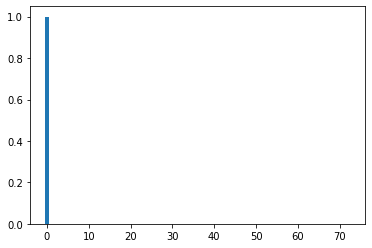

In [32]:
plt.bar(np.arange(73),my_data[1:74,8],label='Data')
plt.show()

In [33]:
entropy(my_data[1:74,8], base=2)

0.00486821844760701

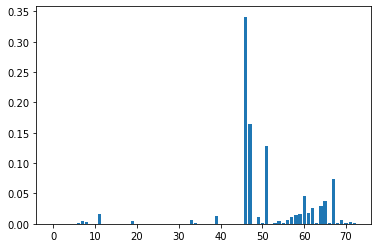

In [34]:
plt.bar(np.arange(73),my_data[1:74,106],label='Data')
plt.show()

In [35]:
entropy(my_data[1:74,106], base=2)

3.3458096203421253

# Problem 3, question f)

In [36]:
results_table=np.zeros(99)
for i in range(8,107):
    results_table[i-8]=entropy(my_data[1:74,i], base=2)

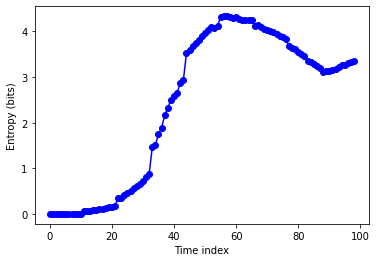

In [37]:
plt.plot(np.arange(99),results_table[:],'bo-')
ax = plt.gca()
ax.set_xlabel("Time index")
ax.set_ylabel("Entropy (bits)")
plt.show()

# Problem 3, question g)

In [38]:
np.sum(my_data[74:199,8:117],axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

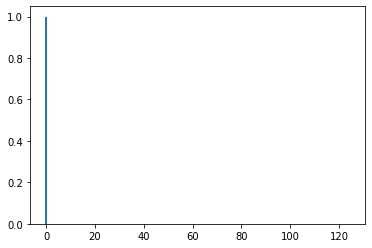

In [39]:
plt.bar(np.arange(125),my_data[74:199,8],label='Data')
plt.show()

In [40]:
entropy(my_data[74:199,8], base=2)

0.01425857901255439

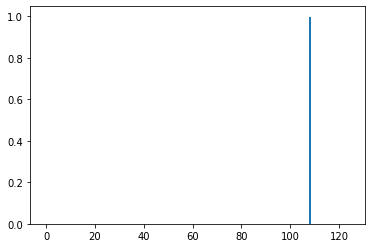

In [41]:
plt.bar(np.arange(125),my_data[74:199,117],label='Data')
plt.show()

In [42]:
entropy(my_data[74:199,117], base=2)

0.02955809598487556

In [43]:
results_table_2=np.zeros(110)
for i in range(8,118):
    results_table_2[i-8]=entropy(my_data[74:199,i], base=2)

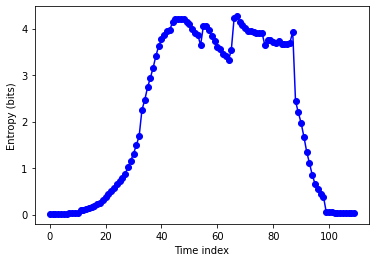

In [44]:
plt.plot(np.arange(110),results_table_2[:],'bo-')
ax = plt.gca()
ax.set_xlabel("Time index")
ax.set_ylabel("Entropy (bits)")
plt.show()